# Predicting gender by voice using Machine Learning / Data Analytics

This notebook will explore the data analysis of predicting a gender based on voice features.
**Classification**

## Dataset

The following acoustic properties of each voice are measured and included within the CSV:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
22. label: male or female

## Aim

1. The aim of this project is to find out the best model with the best accuracy, if the models achieve above 95% accuracy, it is deemed suitable to be used as a model.
2. at the same time reducing unimportant features to maximize computation power.

In [55]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [56]:
# Reading in data

data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [57]:
# Checking for NaN values in dataset

data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [58]:
# Checking for non-number columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [59]:
# Checking for real inbalances in classes
percent_male = data[data.label == 'male'].shape[0] / data.shape[0] * 100
percent_female = data[data.label == 'female'].shape[0] / data.shape[0] * 100
print(f"Number of male samples: {percent_male}%")
print(f"Number of female samples: {percent_female}%")

Number of male samples: 50.0%
Number of female samples: 50.0%


In [60]:
# Since labels are not in numbers and have 2 classes, we split them into 1 and 0
# 0 is female, 1 is male

data.label = [1 if each == 'male' else 0 for each in data.label]
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [61]:
# Normalize all the columns between ranges 0-1
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data[:] = x_scaled
data.head()
#data = pd.DataFrame(x_scaled)
#data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


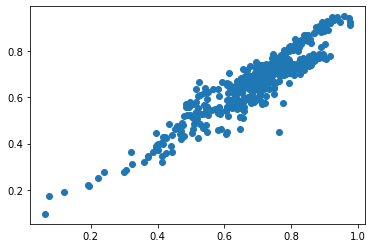

In [62]:
%matplotlib inline

df = data.sample(n=500)
plt.scatter(df['median'], df['meanfreq'])
plt.show()

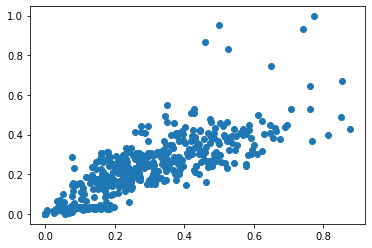

In [63]:
plt.scatter(df['meandom'], df['dfrange'])
plt.show()

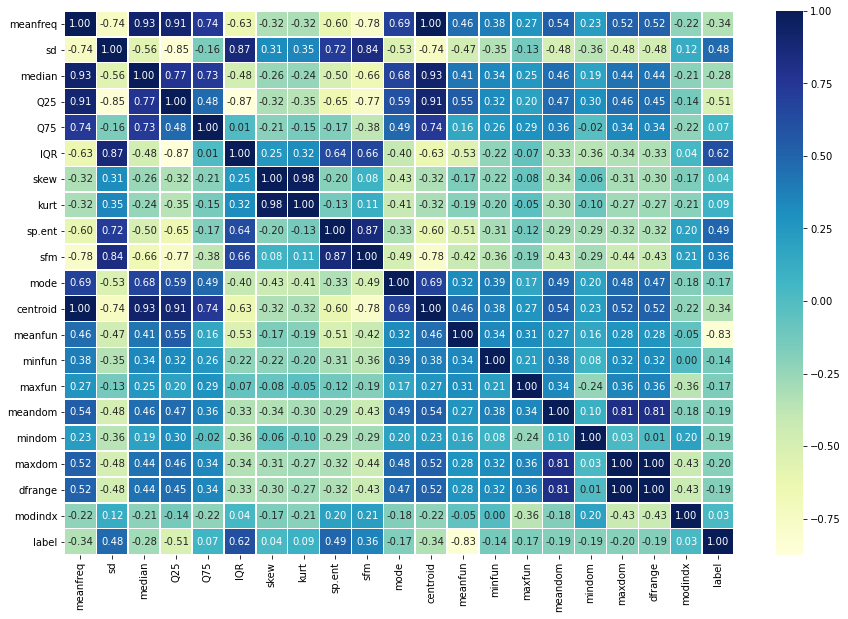

In [64]:
# Doing EDA and check feature importance

# Plots to appear in notebook
%matplotlib inline

# Constructing correlation matrix to sense how each feature correlates to the target (male/female)
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

<AxesSubplot:>

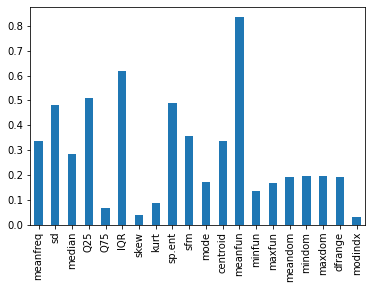

In [65]:
# Plotting bar graph to see correlation to target in detail

corr_to_target = corr_matrix['label'].abs()
corr_to_target.drop(['label'], inplace=True)
corr_to_target.plot(kind="bar")

In [66]:
# Dropping columns which have little to no correlation to the target

data.drop(['skew', 'modindx'], axis=1, inplace=True)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,1.0


In [67]:
# Splitting data into X and y
# X = features, y = target label

X = data.drop(['label'], axis=1)
y = data['label']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [68]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715


In [69]:
# Splitting the data into training and test set of size 0.2

from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange
807,0.665832,0.365315,0.713283,0.573272,0.739741,0.239920,0.002166,0.737625,0.444370,0.666165,0.665832,0.421330,0.191643,0.999749,0.325694,0.040860,0.189421,0.188841
2495,0.690781,0.481685,0.771153,0.751818,0.783035,0.096267,0.006989,0.656182,0.545160,0.713092,0.690781,0.660556,0.197966,0.981526,0.362681,0.040860,0.275197,0.274678
2529,0.777030,0.284782,0.762816,0.719151,0.853189,0.198279,0.006434,0.657650,0.398946,0.635514,0.777030,0.626416,0.193074,0.972570,0.426227,0.040860,0.390994,0.390558
2241,0.360908,0.647398,0.364524,0.153347,0.651711,0.591160,0.003466,0.920187,0.880825,0.062929,0.360908,0.798285,0.339949,0.880415,0.150666,0.006452,0.071837,0.071888
2981,0.663608,0.510232,0.607877,0.554451,0.884850,0.400236,0.004560,0.796302,0.637855,0.558045,0.663608,0.445410,0.124150,0.992409,0.324128,0.086022,0.182586,0.181062


In [70]:
y_train.head()

807     1.0
2495    0.0
2529    0.0
2241    0.0
2981    0.0
Name: label, dtype: float64

## Model choices for classification

1. RandomForest - RandomForestClassifier()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. Logistic Regression - LogisticRegression() 
4. Support Vector Classification svc()
5. XGBoost (if we have time)

### 1. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
clf.score(X_train, y_train)

1.0

In [73]:
# Accuracy score for test dataset
clf.score(X_test, y_test)

0.9810725552050473

In [74]:
# Tuning hyperparameters using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
rs_forest_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(rs_forest_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [75]:
np.random.seed(42)

rs_forest = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rs_forest_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                n_jobs=-1)

rs_forest.fit(X_train, y_train)

print("Done!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


Done!


In [76]:
# Getting best parameters for Random Forest

rs_forest.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [77]:
rs_forest.score(X_test, y_test)

0.9794952681388013

In [78]:
# Getting cross validation scores for best parameters
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=600,
                            min_samples_split=5,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_depth=80,
                            bootstrap=True)
            

In [79]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
rf_acc = cv_acc
rf_acc

0.9662266210175371

In [80]:
np.random.seed(42)
cv_f1 = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1")) # accuracy as scoring
rf_f1 = cv_f1
rf_f1

0.9662526696717915

## Moving Forward

1. Do the same for other models and get the best model to use for our current dataset

### 2. K Neighbours Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9826498422712934

In [82]:
# Tuning Hyperparameters

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
p = [1,2]
metric = ['minkowski']

rs_knn_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric}

print(rs_knn_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'p': [1, 2], 'metric': ['minkowski']}


In [83]:
np.random.seed(42)

rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=rs_knn_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                n_jobs=-1)

rs_knn.fit(X_train, y_train)
rs_knn.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'metric': 'minkowski',
 'leaf_size': 13,
 'algorithm': 'auto'}

In [84]:
np.random.seed(42)
knn = KNeighborsClassifier(n_neighbors=9,
                          weights='distance',
                          p=1,
                          metric='minkowski',
                          leaf_size=13,
                          algorithm='auto')

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9779179810725552

In [85]:
np.random.seed(42)
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(knn,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
knn_acc = cv_acc
knn_acc

0.9498128684697077

In [86]:
np.random.seed(42)
# Cross-validated accuracy score
cv_f1 = np.mean(cross_val_score(knn,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1")) # accuracy as scoring
knn_f1 = cv_f1
knn_f1

0.9508495502392812

### 3. LogisticRegression()

In [87]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9826498422712934

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=param_grid,
                          cv=5,
                          verbose=True,
                          n_jobs=-1)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [89]:
gs_log_reg.score(X_test, y_test)

0.9779179810725552

In [90]:
# Tuning Hyperparameters

c = [int(x) for x in np.logspace(-4, 4, 20)] 
solver = ["liblinear"]

rs_log_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

print(rs_log_grid)

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['liblinear']}


In [91]:
np.random.seed(42)

rs_log = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=rs_log_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_log.fit(X_train, y_train)
rs_log.best_params_
rs_log.score(X_test, y_test)

C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.9794952681388013

In [92]:
np.random.seed(42)
clf = LogisticRegression(C=29.763514416313132,
                        solver='liblinear')

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9794952681388013

In [93]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
log_acc = cv_acc
log_acc

0.9668615226675836

In [94]:
np.random.seed(42)
# Cross-validated accuracy score
cv_f1 = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1")) # accuracy as scoring
log_f1 = cv_f1
log_f1

0.9668484302288258

### 4. Support Vector Classification / SVM

In [95]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9810725552050473

In [96]:
np.random.seed(42)

rs_svc_grid = {"C": np.logspace(-4, 4, 20),
              "gamma": ['scale', 'auto'],
              }

print(rs_svc_grid)

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'gamma': ['scale', 'auto']}


In [97]:
np.random.seed(42)

gs_svc = GridSearchCV(SVC(), param_grid=rs_svc_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

gs_svc.fit(X_train, y_train)
gs_svc.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


{'C': 11.288378916846883, 'gamma': 'scale'}

In [98]:
np.random.seed(42)

rs_svc = RandomizedSearchCV(SVC(),
                                param_distributions=rs_svc_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                n_jobs=-1)

rs_svc.fit(X_train, y_train)
rs_svc.best_params_


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


{'gamma': 'scale', 'C': 11.288378916846883}

In [99]:
np.random.seed(42)
clf_svc = SVC(C=11.288378916846883, gamma='scale')

clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

0.9810725552050473

In [100]:
np.random.seed(42)
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf_svc,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
svc_acc = cv_acc
svc_acc

0.9665460652543345

In [101]:
np.random.seed(42)
# Cross-validated accuracy score
cv_f1 = np.mean(cross_val_score(clf_svc,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1")) # accuracy as scoring
svc_f1 = cv_f1
svc_f1

0.9664222558851459

## 4 Models have been evaluated. Now printing the results

In [44]:
print('Printing final model scores with tuned hyperparameters and cross validation')
print('Random Forest Classifier: ' + str(rf_acc))
print('K Neighbors Classifier: ' + str(knn_acc))
print('Logistic Regression: ' + str(log_acc))
print('Support Vector Classification: ' + str(svc_acc))

Printing final model scores with tuned hyperparameters and cross validation
Random Forest Classifier: 0.9662266210175371
K Neighbors Classifier: 0.9498128684697077
Logistic Regression: 0.9668615226675836
Support Vector Classification: 0.9665460652543345


In [102]:
print('Printing final model f1-scores with tuned hyperparameters and cross validation')
print('Random Forest Classifier: ' + str(rf_f1))
print('K Neighbors Classifier: ' + str(knn_f1))
print('Logistic Regression: ' + str(log_f1))
print('Support Vector Classification: ' + str(svc_f1))

Printing final model f1-scores with tuned hyperparameters and cross validation
Random Forest Classifier: 0.9662526696717915
K Neighbors Classifier: 0.9508495502392812
Logistic Regression: 0.9668484302288258
Support Vector Classification: 0.9664222558851459


### From the results, we can see the rankings of each classifier:
 1. Logistic Regression
 2. Support Vector Classification
 3. Random Forest Classifier
 4. K Neighbors Classification

 Overall, the results are still above 95% accuracy, which means all models are suitable to be used for our model.